In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

rcParams = {'font.size': 30, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Compute_Query_Coverage(group):
    qstarts, qends = group['QStart'].tolist(), group['QEnd'].tolist()
    sstarts, sends = group['SStart'].tolist(), group['SEnd'].tolist()
    alignlengths = np.array(group['AlignLength'].tolist())
    pident = np.array(group['PIdent'].tolist())
    qlength = group.iloc[0]['Qlen']
    slength = group.iloc[0]['SLen']
    presence = np.zeros(qlength)
    avg_pident = np.sum(np.multiply(alignlengths,pident))/np.sum(alignlengths)
    
    for i in range(len(qstarts)):
        presence[qstarts[i]:qends[i]] = 1
    qcov = np.sum(presence)/len(presence)*100
    
    presence = np.zeros(slength)
    for i in range(len(sstarts)):
        presence[sstarts[i]:sends[i]] = 1
    scov = np.sum(presence)/len(presence)*100
   
    return pd.Series({'Qcov':qcov, 'Scov':scov, 'PIdent':avg_pident})

def Load_PAF(filepath):
    try:
        lines = open(filepath).readlines()
        header = ['Query','Qlen','QStart','QEnd','Orientation','Subject','SLen',
                  'SStart','SEnd','Matches','AlignLength','MAPQ']
        op = []
        for l in lines:
            l = l.split('\t')[:12]
            op.append(dict(zip(header, l)))
        df = pd.DataFrame(op)
        df[['Qlen','QStart','QEnd','SLen','SStart',
            'SEnd','Matches','AlignLength','MAPQ']] = df[['Qlen','QStart','QEnd','SLen','SStart',
                                                          'SEnd','Matches','AlignLength','MAPQ']].astype('int')
        df['PIdent'] = df['Matches']/df['AlignLength']*100
        df_grp = df.groupby(['Query','Subject']).apply(Compute_Query_Coverage)
        df_grp['Breadth_Coverage'] = df_grp[['Qcov', 'Scov']].max(axis = 1)
        return df_grp
    except KeyError:
        return pd.DataFrame()

In [2]:
data_path = '/Users/harihara/Mount-2/Synechococcus_paper_analysis/Ref_Guided_Scaffolding_Clustering_Aug_2022/\
Single_Cell_Analysis_75_5_75_500/'
files = listdir(data_path)
df_alignments = pd.DataFrame()
for f in files:
    if f.endswith(".paf"):
        df = Load_PAF(data_path+f)
        if len(df) <= 0:
            continue
        df = df[(df['Scov'] > 95) | (df['Qcov'] > 95)]
        df = df.reset_index()
        df['Single_Cell_Sample'] = f.replace("_FD.paf","")
        df_alignments = df_alignments.append(df, ignore_index = True)
        print(f)

UncmicOcRedA3F18_FD.paf
UncmicOcRedA02K9_FD.paf
UncmicOcRedA3L15_FD.paf
UncmicOcRedA3I13_FD.paf
UncmicORedA02H16_FD.paf
UncmicMusRedA1H3_FD.paf
UncmicMuRedA1E16_FD.paf
UncmicORedA02J10_FD.paf
UncmicOcRedA01D6_FD.paf
UncmicOctRedA3D3_FD.paf
UncmicMRedA02N14_2_FD.paf
UncmicMRedA02L14_2_FD.paf
UncmicMuRedA1F11_FD.paf
UncmicMusRedA1E3_FD.paf
UncmicMusRedA1D3_FD.paf
UncmicMRedA02H13_FD.paf
UncmicMuRedA1G13_FD.paf
UncmicOcRedA02G9_FD.paf
UncmicORedA01E14_FD.paf
UncmicOcRedA2H13_FD.paf
UncmicORedA02F16_FD.paf
UncmicMRedA02L18_FD.paf
UncmicMusRedA1G6_FD.paf
UncmicMRedA02K12_2_FD.paf
UncmicORedA02M16_FD.paf
UncmicOcRedA1E20_FD.paf
UncmicMusRedA1D3_2_FD.paf
UncmicOcRedA2E16_FD.paf
UncmicMuRedA1I19_FD.paf
UncmicORedA02L17_FD.paf
UncmicOcRedA01F9_FD.paf
UncmicOcRedA01C8_FD.paf
UncmicOcRedA3F17_FD.paf
UncmicOcRedA01C9_FD.paf
UncmicMRedA02J16_FD.paf
UncmicOcRedA3G12_FD.paf
UncmicMuRedA1J20_FD.paf
UncmicOcRedA1K15_FD.paf
UncmicMusRedA1C3_2_FD.paf
UncmicMuRedA1H18_FD.paf
UncmicORedA02C18_FD.paf
Uncmic

UncmicOctRedA3D7_FD.paf
UncmicOcRedA01H8_FD.paf
UncmicOcRedA3D16_FD.paf
UncmicMuRedA1J18_FD.paf
UncmicMRedA02F16_2_FD.paf
UncmicMusRedA1J3_2_FD.paf
UncmicOcRedA3J13_FD.paf
UncmicMusRedA1H8_FD.paf
UncmicORedA02M17_FD.paf
UncmicORedA02H22_FD.paf
UncmicMRedA02K20_FD.paf
UncmicMuRedA1H19_FD.paf
UncmicOctRedA1C8_FD.paf
UncmicORedA02I22_FD.paf
UncmicMRedA02I11_2_FD.paf
UncmicMusRedA1J3_FD.paf
UncmicMRedA02D20_FD.paf
UncmicMuRedA02K9_FD.paf
UncmicMRedA02J14_FD.paf
UncmicORedA02I14_FD.paf
UncmicOcRedA01F6_FD.paf
UncmicMRedA02M13_2_FD.paf
UncmicMuRedA1H12_FD.paf
UncmicMuRedA1J11_FD.paf
UncmicMRedA02C21_FD.paf
UncmicOcRedA01E9_FD.paf
UncmicMuRedA02K9_3_FD.paf
UncmicMRedA02F18_2_FD.paf
UncmicMRedA02N21_FD.paf
UncmicOctRedA3N3_FD.paf
UncmicOctRedA3C3_FD.paf
UncmicORedA01E10_FD.paf


In [3]:
df_groups = pd.read_csv('/Users/harihara/Mount-2/Synechococcus_paper_analysis/Ref_Guided_Scaffolding_Clustering_Aug_2022/\
BLAST_All_vs_All_75_5_75_500/containment_clusters.txt',
                        sep = "\t")
df_groups = df_groups[['GroupID','RepresentativeContig']]
df_groups = df_groups.set_index(['RepresentativeContig'])
df_groups = df_groups.drop_duplicates()

df_filtered_alignments = df_alignments[df_alignments['PIdent'] > 70]

df_grp = df_filtered_alignments.groupby('Subject').count()[['Single_Cell_Sample']]
df_grp = df_grp.join(df_groups, how = 'inner')
df_grp = df_grp.set_index('GroupID')
df_grp['Single_Cell_Sample'] = df_grp['Single_Cell_Sample'].fillna(0)
df_grp = df_grp.sort_values(by = 'Single_Cell_Sample', ascending = False)

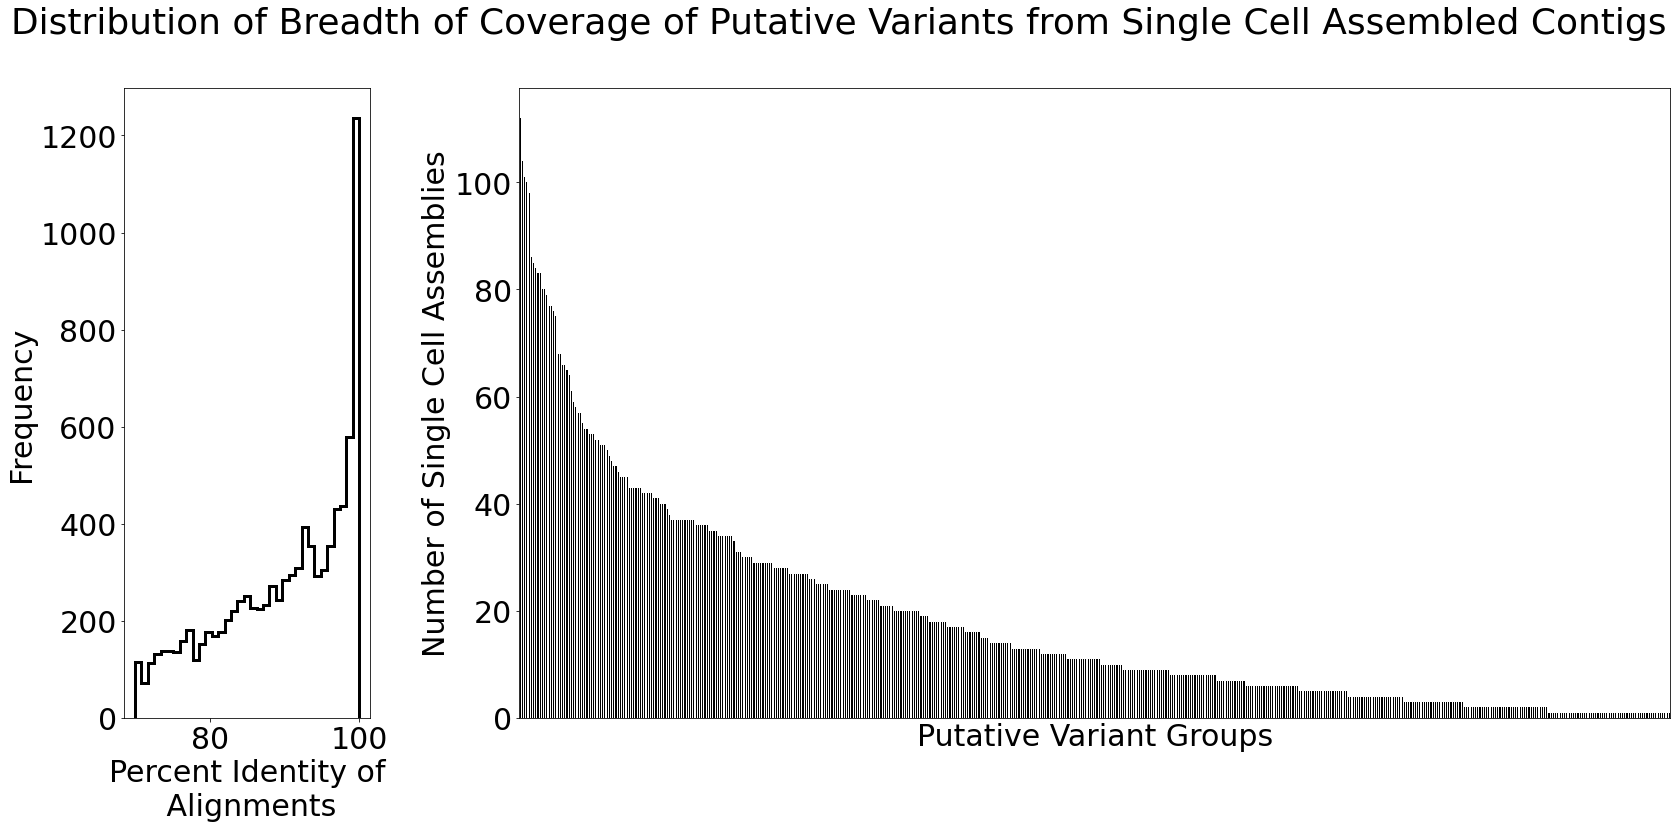

In [8]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,2,figsize = (24,12), gridspec_kw={'width_ratios': [0.75, 3.5]})
df_filtered_alignments[['PIdent']].plot(kind = 'hist', bins = 35, ax = ax[0], histtype='step',
                                                  linewidth=3, legend = False, color = 'black')
fig.suptitle('Distribution of Breadth of Coverage of Putative Variants from Single Cell Assembled Contigs')
ax[0].set_xlabel('Percent Identity of\n Alignments')

df_grp.plot(kind = 'bar', ax = ax[1], legend = False,color = 'black')
ax[1].set_ylabel('Number of Single Cell Assemblies')
ax[1].set_xticks([])
ax[1].set_xlabel('Putative Variant Groups')
fig.tight_layout()

fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Breadth-Dist.pdf')